In [1]:
import pandas as pd
import numpy as np
import ast
#ast.literal_eval
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./ted_main.csv")

In [3]:
df.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520  
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292  
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550  
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869

In [4]:
def extract( x , name = "Funny" ):
    
    data = ast.literal_eval( x )
    c = 0 
    for e in data:
        if e["name"] == name:
            c = e["count"]
            return c 
    

In [5]:
df.loc[: , "Funny"] = df["ratings"].apply( lambda x :  extract( x , "Funny") )
df.loc[: , "Confusing"] = df["ratings"].apply( lambda x :  extract( x , "Confusing") )
df.loc[: , "Inspiring"] = df["ratings"].apply( lambda x :  extract( x , "Inspiring") )

In [6]:
df.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  Funny  \
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  19645   
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520    544   
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292    964   
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550     59   
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869   1390   

   Confusing  Inspiring  
0        242      24924  
1         62        413  
2         27        230  
3         32       1070  
4         72       2893

In [7]:
df["tags"] = df["tags"].apply( lambda x: ast.literal_eval(x) )

In [8]:
tags = df["tags"]

In [9]:
all_tags = []
for tl in tags:
    all_tags += tl
    

In [10]:
def CountFrequency(my_list): 
      
    # Creating an empty dictionary  
    freq = {}
    pairs = []
    for items in my_list: 
        freq[items] = my_list.count(items) 
      
    for key, value in freq.items(): 
        pairs.append(  ( value , key ) )
        #print (key, value)
    sorted_pairs = sorted(pairs, key=lambda tup: tup[0] , reverse=True)
    return sorted_pairs 

In [11]:
freq_pairs  = CountFrequency( all_tags)

In [12]:
def tagInTop( x , top_100) :
    #print( x )
    for tag in x:
        if tag in top_100:
            return 1
    return 0

In [13]:
top_100 = freq_pairs[:100]
top_100_list = [ x[1] for x in top_100 ]
for  i , t in enumerate( top_100_list ):
    
    df["f_{}".format( i )  ] = df["tags"].apply( lambda x :  1 if t in x else 0 )

In [14]:
df["f_1"].sum()

567

In [16]:
df_num = df.select_dtypes( include = [ "number" ]  )

In [17]:
df_num.head()

comments  duration   film_date  languages  num_speaker  published_date  \
0      4553      1164  1140825600         60            1      1151367060   
1       265       977  1140825600         43            1      1151367060   
2       124      1286  1140739200         26            1      1151367060   
3       200      1116  1140912000         35            1      1151367060   
4       593      1190  1140566400         48            1      1151440680   

      views  Funny  Confusing  Inspiring  ...  f_90  f_91  f_92  f_93  f_94  \
0  47227110  19645        242      24924  ...     0     0     0     0     0   
1   3200520    544         62        413  ...     0     0     0     0     0   
2   1636292    964         27        230  ...     0     0     0     0     0   
3   1697550     59         32       1070  ...     0     0     0     0     0   
4  12005869   1390         72       2893  ...     0     0     0     0     0   

   f_95  f_96  f_97  f_98  f_99  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     0     0     0     0     0  
4     1     0     0     0     0  

[5 rows x 110 columns]

In [18]:
df_views = df_num["views"]
df_num = df_num.drop( ["film_date" , "published_date"  , "views"] , axis = 1)

In [19]:
df_num.head()

comments  duration  languages  num_speaker  Funny  Confusing  Inspiring  \
0      4553      1164         60            1  19645        242      24924   
1       265       977         43            1    544         62        413   
2       124      1286         26            1    964         27        230   
3       200      1116         35            1     59         32       1070   
4       593      1190         48            1   1390         72       2893   

   f_0  f_1  f_2  ...  f_90  f_91  f_92  f_93  f_94  f_95  f_96  f_97  f_98  \
0    0    0    0  ...     0     0     0     0     0     0     0     0     0   
1    1    1    1  ...     0     0     0     0     0     0     0     0     0   
2    1    0    0  ...     0     0     0     0     0     0     0     0     0   
3    0    0    0  ...     0     0     0     0     0     0     0     0     0   
4    0    0    1  ...     0     0     0     0     0     1     0     0     0   

   f_99  
0     0  
1     0  
2     0  
3     0  
4     0  

[5 rows x 107 columns]

In [20]:
df_tags = df_num[ [ "f_{}".format(i) for i in range(100)  ]]

In [22]:
df_tags.head()

f_0  f_1  f_2  f_3  f_4  f_5  f_6  f_7  f_8  f_9  ...  f_90  f_91  f_92  \
0    0    0    0    1    0    0    0    0    0    0  ...     0     0     0   
1    1    1    1    1    0    0    0    0    0    0  ...     0     0     0   
2    1    0    0    0    0    0    0    1    0    0  ...     0     0     0   
3    0    0    0    0    0    0    1    0    0    0  ...     0     0     0   
4    0    0    1    0    0    0    0    0    1    0  ...     0     0     0   

   f_93  f_94  f_95  f_96  f_97  f_98  f_99  
0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0  
4     0     0     1     0     0     0     0  

[5 rows x 100 columns]

In [23]:
log_views = np.log( df_views )

In [24]:
reg = LinearRegression().fit( df_tags.values , df_views.values )

In [25]:
reg.score( df_tags.values , df_views )

0.12912238131274933

In [26]:
selector = SelectFromModel( Lasso( alpha = 0.5 ) )
selector.fit( df_tags.values , df_views.values )

SelectFromModel(estimator=Lasso(alpha=0.5, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [27]:
reg_lasso =  Lasso( alpha = 0.001 )
reg_lasso.fit( df_tags.values , log_views.values )

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
reg_lasso.coef_

array([-0.09117944, -0.11257683, -0.20467108,  0.17231153, -0.21074563,
       -0.18376036,  0.04477664, -0.        ,  0.03360653,  0.02641987,
        0.        , -0.20690396, -0.0991548 ,  0.03378482,  0.13068124,
        0.09519826, -0.02483476,  0.03362942, -0.05110775, -0.00067478,
       -0.01783898, -0.03818046,  0.16982664, -0.03625576,  0.21687944,
       -0.04114939, -0.11831139, -0.02757017, -0.04414343, -0.15490352,
        0.02457358, -0.1590887 , -0.23851105, -0.16071718,  0.3863726 ,
       -0.01404716,  0.        ,  0.        ,  0.15547591, -0.1354378 ,
        0.12080244,  0.01831305,  0.        , -0.07087737, -0.        ,
       -0.33947753,  0.15477025, -0.        , -0.        ,  0.02865074,
        0.        ,  0.03982638,  0.06622055, -0.00377061, -0.00602089,
        0.        ,  0.        ,  0.13264671, -0.        , -0.        ,
       -0.15088245, -0.09525867, -0.2611497 , -0.        , -0.10439647,
        0.01955935,  0.24706156, -0.        ,  0.41314504,  0.00

In [29]:
features_mask = reg_lasso.coef_ != 0 
features_mask

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
        True,  True, False, False,  True, False,  True,  True,  True,
        True, False, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False])

In [30]:
top_100_np = np.array( top_100_list)# [ selector.get_support ]
top_100_np[ features_mask ]

array(['technology', 'science', 'global issues', 'culture', 'TEDx',
       'design', 'business', 'health', 'innovation', 'art',
       'social change', 'future', 'communication', 'creativity',
       'biology', 'humanity', 'collaboration', 'environment', 'economics',
       'medicine', 'brain', 'activism', 'education', 'community',
       'history', 'children', 'TED Fellows', 'music', 'invention',
       'health care', 'politics', 'cities', 'psychology', 'storytelling',
       'nature', 'war', 'identity', 'computers', 'life', 'Africa',
       'humor', 'inequality', 'government', 'photography',
       'medical research', 'neuroscience', 'visualizations', 'live music',
       'disease', 'oceans', 'green', 'potential', 'happiness', 'work',
       'mind', 'violence', 'media', 'evolution', 'writing',
       'big problems', 'global development', 'entrepreneur', 'motivation',
       'genetics', 'biodiversity', 'poverty', 'robots', 'mental health',
       'cognitive science', 'math', 'food', '

# Exercise 2 - HASYv2 


In [2]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df_labels = pd.read_csv("./HASYv2/hasy-data-labels.csv")
df_labels = df_labels[ df_labels["symbol_id"] <= 80   ]
df_labels = df_labels[ df_labels["symbol_id"] >= 70   ]

data = [ ]
labels = [ ]
for p  , l in  zip(df_labels["path"].values , df_labels["symbol_id"].values ):
    #print(p)
    im = cv2.imread( "HASYv2/" + p , cv2.IMREAD_GRAYSCALE   )
    im = im.flatten()
    data.append( im )
    labels.append( l )
    
data = np.array( data )
labels = np.array( labels )
labels = labels - 70 


x_val = data[:100]
y_val = labels[:100]

X_train, X_test, y_train, y_test = train_test_split( data[100:], labels[100:], test_size=0.20, random_state=42 )


In [3]:
from   sklearn.ensemble import RandomForestClassifier

In [4]:
sizes = [ 10 , 20 , 70 , 50 , 100 , 150 , 175 , 200 , 300 , 400 ]
scores = []
scores_train = []
for s in sizes:
    clf = RandomForestClassifier(n_estimators=s, max_depth= 4, random_state=0)
    clf.fit( X_train , y_train )
    
    y_pred = clf.predict( x_val )
    sco = accuracy_score( y_val , y_pred )
    scores.append( sco )
    
    y_pred = clf.predict( X_train )
    sco = accuracy_score( y_pred , y_train )
    scores_train.append( sco )
    
    
    
    

In [5]:
scores

[0.55, 0.56, 0.6, 0.63, 0.6, 0.61, 0.61, 0.62, 0.61, 0.62]

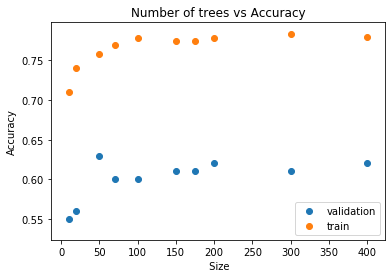

In [6]:
plt.scatter( sizes , scores )
plt.xlabel(" Size")
plt.ylabel( "Accuracy")
plt.title( "Number of trees vs Accuracy")

plt.scatter( sizes, scores_train )
plt.legend( ["validation" , "train"])
plt.show()

# Reshufle 

In [7]:
X_train, X_val, y_train, y_val = train_test_split( data, labels , test_size=0.20, random_state=42 )

In [8]:
N = int( len( y_val) /2 )
X_test = X_val[ :  N ]
y_test = y_val[ :  N ]

X_val = X_val[ N  :  ]
y_val = y_val[ N : ]

In [9]:
X_val.shape
y_val.shape

(102,)

In [10]:
m = 100
depth = 4
clf = RandomForestClassifier(n_estimators= m , max_depth= depth, random_state= 0)
clf.fit( X_train , y_train )

train_acc = accuracy_score( y_train , clf.predict( X_train ))
val_acc = accuracy_score(  y_val , clf.predict(  X_val )  )

print(val_acc)
print( train_acc )

0.6372549019607843
0.7745098039215687


In [11]:
test_acc = accuracy_score(  y_test , clf.predict(  X_test )  )
test_acc

0.6274509803921569

In [13]:
from tpot import TPOTClassifier

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))